In [1]:
import os
import torch
from pathlib import Path

from fastai.torch_core import set_seed

from fastai.data.block import DataBlock, DataLoader, CategoryBlock
from fastai.data.transforms import GrandparentSplitter

from fastai.vision.augment import Resize, aug_transforms
from fastai.vision.data import ImageBlock, get_image_files, parent_label
from fastai.vision.learner import Learner, vision_learner

from fastai.metrics import accuracy

from utils_f.label import get_verbal_label
from utils_f.gpu import manage_gpu
from utils_f.path import get_features_paths, get_learner_path
from Model.model_custom import Vgg16_Custom

# Hyperparameter

In [2]:
batch_size = 32

# Environment

In [3]:
os.environ["TORCH_HOME"] = "Model/"
os.environ["FASTAI_HOME"] = "Data/"

# Device

In [4]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Module

In [5]:
#

# ----------------------------------------

# Transforms

In [6]:
set_seed(42, True)

In [7]:
itfms = Resize(224)
btfms = None

# Dataset Path

In [8]:
dts_path = Path("Data\ImageNet\extract_1000_fast")

# DataBlock

In [9]:
name_data = "data"
name_target = "target"

dtb = DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items= get_image_files,
    get_y= get_verbal_label,
    splitter= GrandparentSplitter(train_name= name_data, valid_name= name_target),
    item_tfms= itfms,
    batch_tfms= btfms)

# DataLoaders

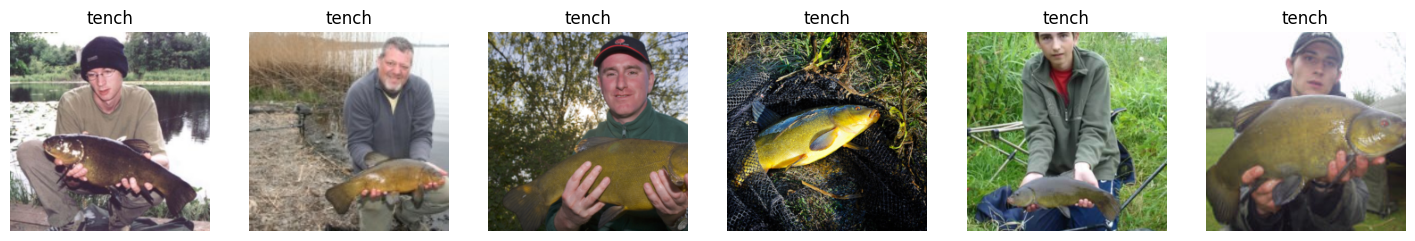

In [10]:
dls = dtb.dataloaders(dts_path, shuffle= False, bs= batch_size)
dls.train.show_batch(max_n= 6, nrows= 1)

# ----------------------------------------

# Model

In [11]:
model = Vgg16_Custom()

# Learner

In [12]:
learner = Learner(dls, model, metrics= None)

# ----------------------------------------

# Features

In [13]:
fts_data, _ = learner.get_preds(0)
fts_target, _ = learner.get_preds(1)

manage_gpu()
fts_data.shape, fts_target.shape

Memory Reserved | 3502 | 3502 | 100%


(torch.Size([800, 4096]), torch.Size([200, 4096]))

# Export Features

In [14]:
fts_data_path, fts_target_path = get_features_paths(dts_path, model)
fts_data_path, fts_target_path

(Path('Feature/extract_1000_fast/extract_1000_fast_vgg16_data_ft.pt'),
 Path('Feature/extract_1000_fast/extract_1000_fast_vgg16_target_ft.pt'))

In [15]:
torch.save(fts_data, fts_data_path)
torch.save(fts_target, fts_target_path)

# Export Learner

In [16]:
learner_folder_name = "Learner/"

learner_path = get_learner_path(dts_path, model)

learner_path

Path('Learner/extract_1000_fast/extract_1000_fast_vgg16_learner.pkl')

In [17]:
learner.export(learner_path)